<a href="https://colab.research.google.com/github/Shihab7u/Brain-Tumor-Detection-and-Classification/blob/main/CovNet-(dataset_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1wBZCfE2-RMGHHlbMu6uPYYTFiWWRHmEP/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1wBZCfE2-RMGHHlbMu6uPYYTFiWWRHmEP
To: /content/Brain_Image.zip
100% 156M/156M [00:03<00:00, 39.4MB/s]


In [ ]:
!unzip "/content/Brain_Image.zip" > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [ ]:
path = os.listdir('/content/Training/')
classes = {'glioma':0, 'meningioma':1, 'notumor':2, 'pituitary':3}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth1 = '/content/Training/'+cls
    for j in os.listdir(pth1):
        img = cv2.imread(pth1+'/'+j, 1) #0 for input shape (256,256,3) have to repalce 0 with 1
        img = cv2.resize(img, (224,224)) #256,256
        X.append(img)
        Y.append(classes[cls])

for cls in classes:
    pth2 = '/content/Testing/'+cls
    for j in os.listdir(pth2):
        img = cv2.imread(pth2+'/'+j, 1) #0 for input shape (256,256,3) have to repalce 0 with 1
        img = cv2.resize(img, (224,224)) #256,256
        X.append(img)
        Y.append(classes[cls])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages1(path):
  """
  input : path
  output : preprocessed image
  """
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function = preprocess_input, horizontal_flip = True) # data agumentation, zoom range = 0.2, shear_range = 0.2
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode = 'categorical') #batch size

  return image

In [ ]:
def preprocessingImages2(path):
  """
  input : path
  output : preprocessed image
  """
  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode = 'categorical')

  return image

In [ ]:
path = "/content/Training/"
train_data = preprocessingImages1(path)

Found 5712 images belonging to 4 classes.


In [ ]:
path = "/content/Testing/"
test_data =  preprocessingImages2(path)

Found 1311 images belonging to 4 classes.


In [ ]:
X = np.array(X)
Y = np.array(Y)

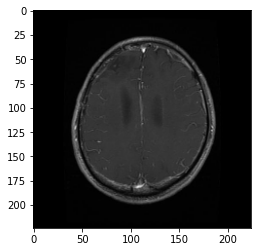

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,test_size=.20) #random_state=10

In [ ]:
xtrain.shape, xtest.shape

((5618, 224, 224, 3), (1405, 224, 224, 3))

In [ ]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D,Add
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D,MaxPooling2D

In [ ]:
model = Sequential()


model.add(Conv2D(32, 5, activation='relu',input_shape = (224,224,3))) #3 Conv1D
model.add(MaxPooling2D(pool_size=4)) #2
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(64, 5, activation='relu'))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, 5, activation='relu')) #2
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(256, 5, activation='relu')) #2
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))




model.add(Flatten())
model.add(Dense(256, activation='relu')) #128
model.add(BatchNormalization())
model.add(Dropout(0.1)) #0.3
model.add(Dense(128, activation='softmax')) #128

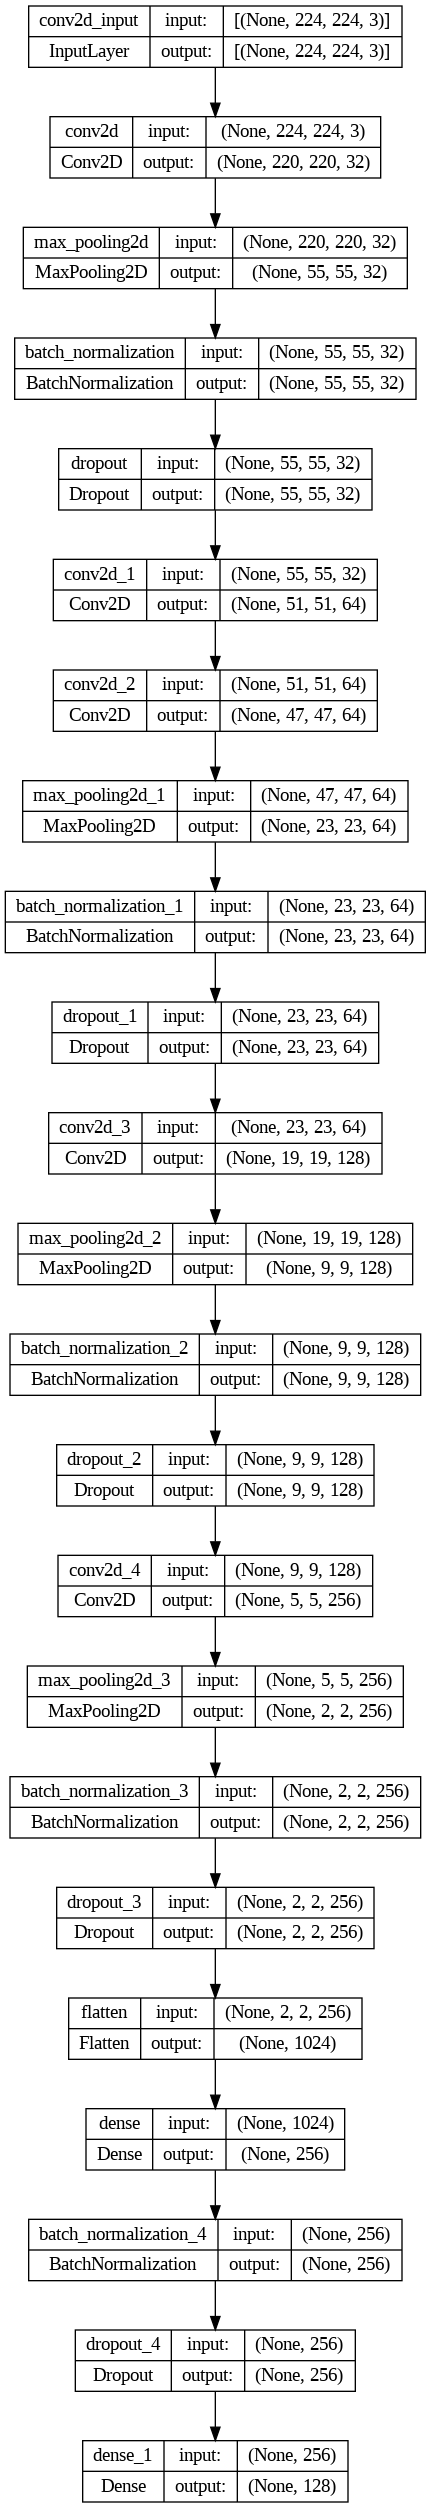

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='CNN Architecture.png')

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 55, 55, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 51, 51, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        1

In [ ]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [ ]:
r=model.fit(xtrain,
          ytrain,
          epochs=60,
          batch_size=32,
          verbose=1,
          validation_data=(xtest,ytest),
          shuffle=False
          )

Epoch 1/60
176/176 [==============================] - 19s 58ms/step - loss: 1.0289 - accuracy: 0.7734 - val_loss: 7.5373 - val_accuracy: 0.3317
Epoch 2/60
176/176 [==============================] - 8s 48ms/step - loss: 0.4243 - accuracy: 0.8676 - val_loss: 4.3723 - val_accuracy: 0.5402
Epoch 3/60
176/176 [==============================] - 9s 49ms/step - loss: 0.2647 - accuracy: 0.9108 - val_loss: 2.8469 - val_accuracy: 0.5317
Epoch 4/60
176/176 [==============================] - 8s 48ms/step - loss: 0.1634 - accuracy: 0.9450 - val_loss: 0.7071 - val_accuracy: 0.8149
Epoch 5/60
176/176 [==============================] - 8s 48ms/step - loss: 0.1228 - accuracy: 0.9555 - val_loss: 0.3973 - val_accuracy: 0.8847
Epoch 6/60
176/176 [==============================] - 8s 48ms/step - loss: 0.0939 - accuracy: 0.9687 - val_loss: 0.5127 - val_accuracy: 0.8356
Epoch 7/60
176/176 [==============================] - 9s 48ms/step - loss: 0.0724 - accuracy: 0.9719 - val_loss: 1.4407 - val_accuracy: 0.658

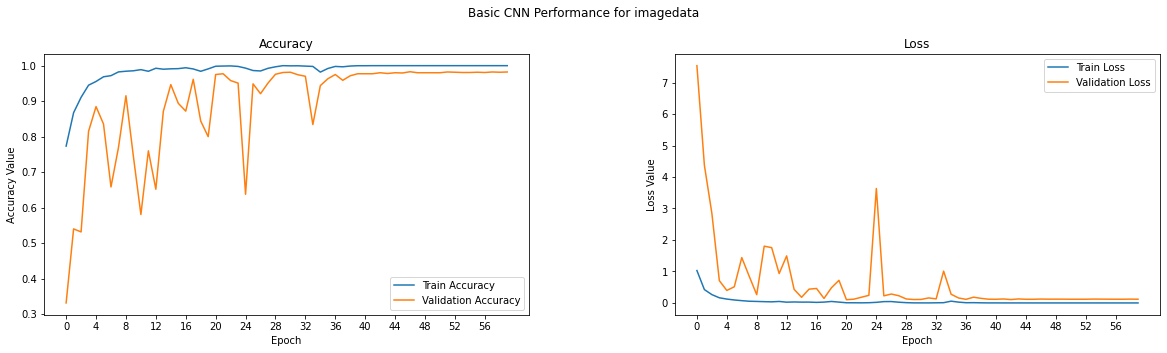

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
t = f.suptitle('Basic CNN Performance for imagedata', fontsize=12 )
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,60))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 60, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 60, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


plt.savefig('CNN Performance imagedata.png')

In [ ]:
pred=model.predict(xtest)
Y_pred = np.argmax(pred, 1)

44/44 [==============================] - 1s 17ms/step


In [ ]:
Y_pred.shape

(1405,)

In [ ]:
ytest.shape

(1405,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(ytest, Y_pred))

Confusion Matrix
[[322   9   0   0]
 [  3 325   5   2]
 [  0   3 398   1]
 [  0   2   0 335]]


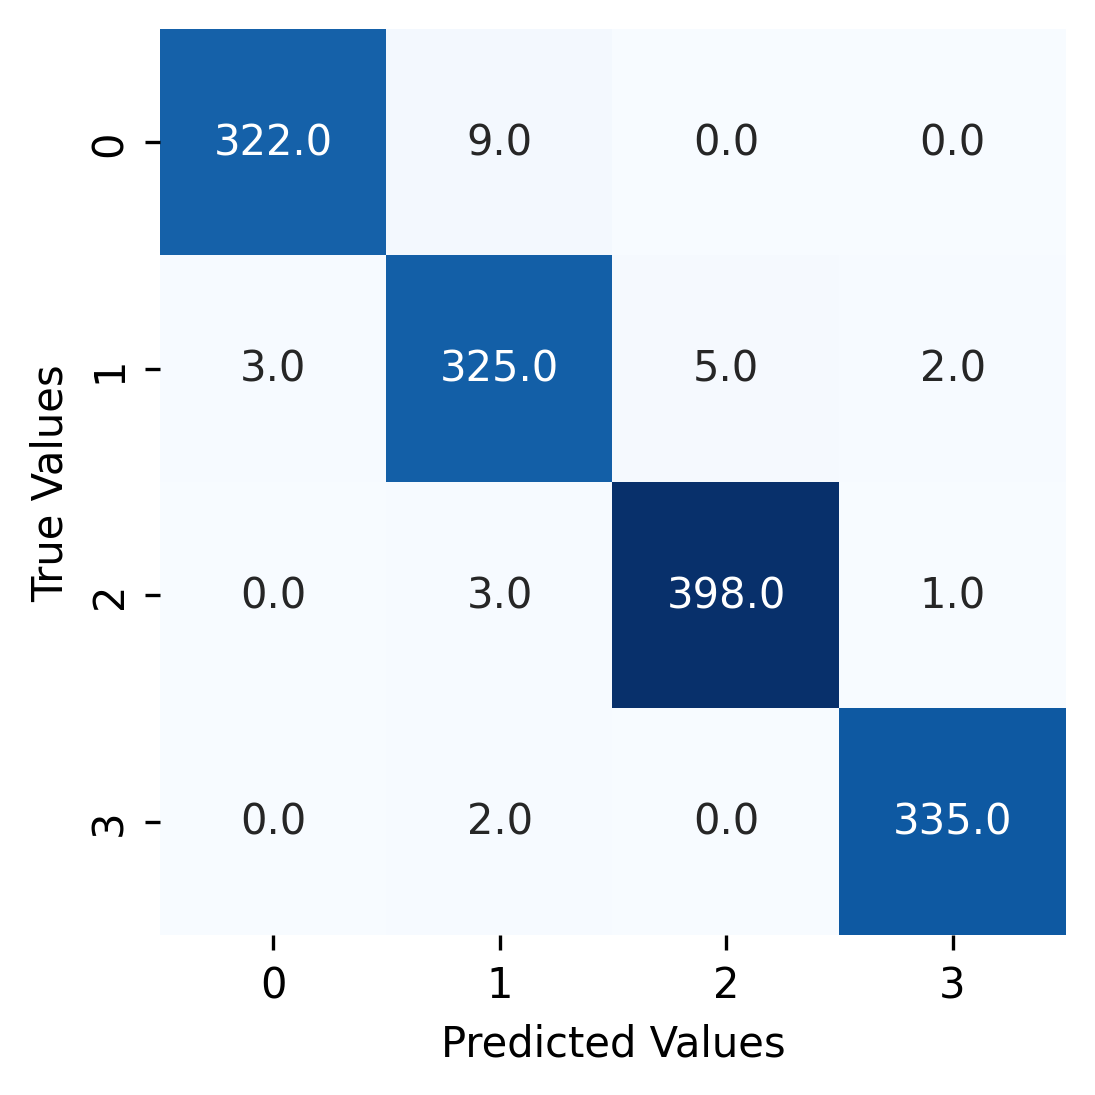

In [ ]:
import seaborn as sns
cm=confusion_matrix(ytest, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print(classification_report(ytest, Y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.99      0.97      0.98       331
meningioma_tumor       0.96      0.97      0.96       335
        no_tumor       0.99      0.99      0.99       402
 pituitary_tumor       0.99      0.99      0.99       337

        accuracy                           0.98      1405
       macro avg       0.98      0.98      0.98      1405
    weighted avg       0.98      0.98      0.98      1405



In [ ]:
print(ytrain)

[2 1 3 ... 1 3 0]


[Text(0, 0.5, 'glioma'),
 Text(0, 1.5, 'meningioma'),
 Text(0, 2.5, 'no_tumor'),
 Text(0, 3.5, 'pituitary')]

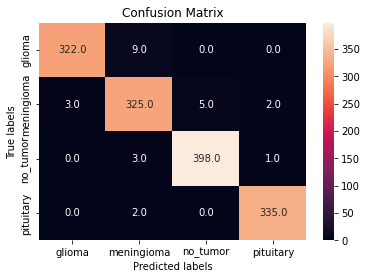

<Figure size 1800x1200 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['glioma', 'meningioma', 'no_tumor', 'pituitary']); ax.yaxis.set_ticklabels(['glioma', 'meningioma', 'no_tumor', 'pituitary'])



Confusion Matrix :
[[322   9   0   0]
 [  3 325   5   2]
 [  0   3 398   1]
 [  0   2   0 335]]
Accuracy Score : 0.9822064056939501
Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       331
           1       0.96      0.97      0.96       335
           2       0.99      0.99      0.99       402
           3       0.99      0.99      0.99       337

    accuracy                           0.98      1405
   macro avg       0.98      0.98      0.98      1405
weighted avg       0.98      0.98      0.98      1405



(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efbf6272670>)

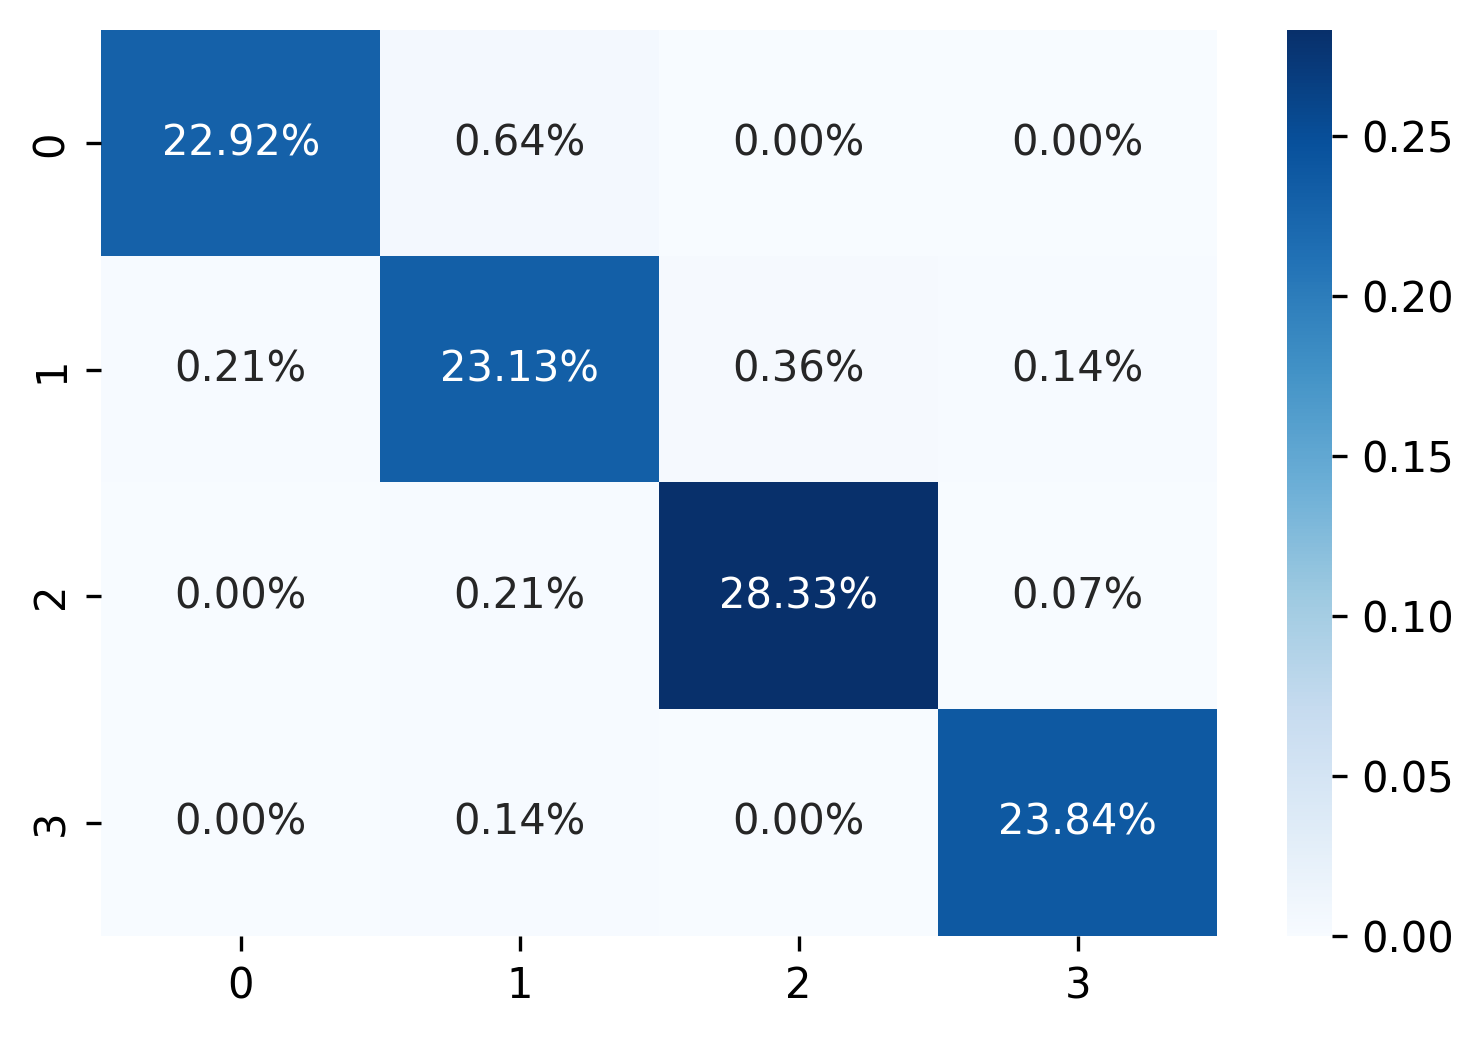

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(ytest,Y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(ytest,Y_pred))
print('Report : ')
print(classification_report(ytest,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.6606709721581524

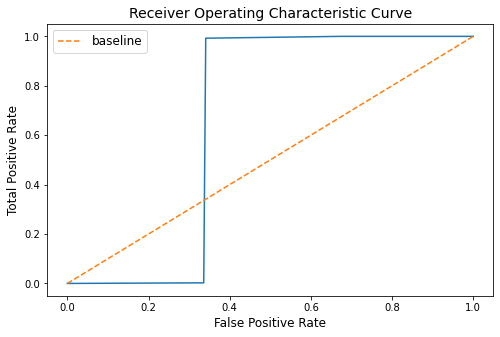

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);